# <center>Flight Delay Prediction- Deep Learning</center>

In this Jupyter file, we enhanced our simple Deep Neural Network (DNN) model for predicting flight delays by incorporating dropout layers. We continued to utilize the two optimizers: Adam and Stochastic Gradient Descent (SGD). Initially, the model was trained using the original dataset, with all 25 features (X). Subsequently, we retrained the model using a reduced set of 15 features obtained through Principal Component Analysis (PCA) (X_pca). Both training runs used the same target label class (y).

The files X, X_pca, and y store the processed data, all saved from the "flightdelay_ML" Jupyter file. This augmentation in the model aims to enhance its robustness and predictive capabilities.




## Loading the neccessary libraries and packages

In [3]:
# pandas used for data manipulation and analysis, providing data structures like DataFrames for working with tabular data. 
import pandas as pd  
import numpy as np    
import seaborn as sns
import matplotlib               
import pprint                        
import matplotlib.pyplot as plt 

In [22]:
# Taking care of jupyter environment 
# show graphs in-line, and turn on/off pretty_printing of lists
%matplotlib inline 
%pprint       

Pretty printing has been turned ON


In [5]:
#ignore warning 
import warnings
warnings.filterwarnings("ignore")

In [6]:
# retina quality: to better display the plots. Any display with retina resolution will make the figures look better
# if your monitor's resolution is sub-retina than the improvement will be less noticeable [2].
%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')

## Exploratory Data Analysis(EDA)¶

#### Reading Data from Files

X are the features and y are the label class 'DEP_DEL15'

In [7]:
# Read the features and labels csv files created from the previous file
X = pd.read_csv('flightdelay_features.csv').to_numpy() 
y = pd.read_csv('flightdelay_labels.csv').to_numpy().reshape(-1) 

In [6]:
### Observing and describing data
print(X, X.shape, y, y.shape)

[[ 0.64608124 -0.19790155 -0.07142458 ... -0.19869827 -0.010031
  -0.04950964]
 [-0.24850538 -0.08099072  0.61167012 ... -0.25204769 -0.1400736
   0.08124148]
 [ 0.77087016 -0.30282252 -0.4088514  ... -0.02361534  0.06659904
  -0.05760408]
 ...
 [ 0.56117762 -0.17347274  0.43808623 ...  0.0495726   0.05154949
  -0.29510212]
 [ 0.30612197 -0.0882988  -0.15566021 ... -0.07319115 -0.15950104
   0.21921444]
 [ 0.75454737 -0.44025934 -0.0748583  ... -0.21905507 -0.14196113
  -0.08897292]] (809568, 15) [0 0 0 ... 1 1 1] (809568,)


In [7]:
print(X.shape, y.shape)

(809568, 15) (809568,)


We are ready to build a deep learning models

## Deep Learning:

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from sklearn import metrics
from keras.layers import Dense, Dropout
from keras.utils import plot_model

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)    # test set= 20% and the random seed=42
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)     

(566697, 15) (566697,) (242871, 15) (242871,)


The data splited 70% for training while 30% for testing

Using random_state=42 (or any integer) is a way to set the random seed for the randomization process, ensuring the reproducibility of results. In simpler terms, employing the same random_state value will consistently produce the same data split each time the code is run, resulting in identical outcomes. Reproducibility is of significant importance in data science and various other domains. [https://towardsdatascience.com/how-to-use-random-seeds-effectively-54a4cd855a79]

## Construct the DNN model

### 1. Using the original dataset that contains 6489062 rows and 26 columns.

#### First model

<b>Simple Feedforward Neural Network</b> is a fundamental type of artificial neural network used in supervised learning. In feedforward neural networks, data moves in a single direction: from the input layer, through any hidden layers, and ultimately to the output layer, enforcing a strict forward flow. Each layer comprises interconnected nodes, commonly known as neurons. These neurons receive inputs from the preceding layer, process the information, and transmit the results to the subsequent layer. Activation functions are applied to these inputs at each node, introducing non-linearity to the model. 

In [11]:
# Define the model
model = Sequential()
# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=15))  # Input layer with 128 neurons and ReLU activation
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))  # Hidden layer with 64 neurons and ReLU activation
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification 
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


This neural network model initiates with an input layer comprising 15 neurons representing features, employing Rectified Linear Unit (ReLU) activation. To reduce the overfitting risk, dropout layers with a 0.5 dropout rate follow the input and subsequent hidden layer, which consists of 32 neurons using ReLU activation. The last layer, designed for binary classification tasks, features a single neuron with a sigmoid activation function. 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


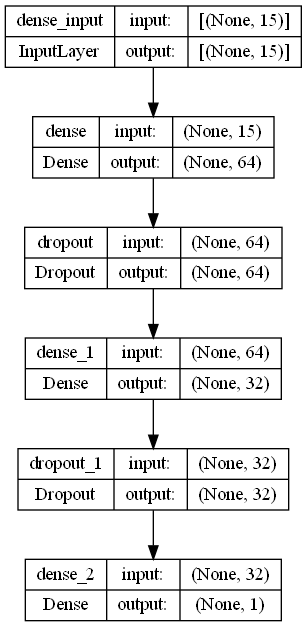

In [13]:
#Use the Keras Sequential Architecture
plot_model(model, show_shapes=True, show_layer_names=True)

#### Using <b>Adam</b> optimizer and <b>binary_crossentropy</b> loss

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- Optimizer= 'adam' because Adam is a default choice for many deep learning tasks because it combines the benefits of both AdaGrad and RMSProp like faster convergence, and effective parameter updates, enhancing training efficiency.
- loss = 'binary_crossentropy'is an ideal choice for binary classification.
- metrics='accuracy' as accuracy it is a crucial measure for classification tasks to assess the model's ability to predict the correct class. 

In [15]:
# Train the Model (verbos = 2 to display the training progress for each epochs )
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2) 

Epoch 1/10
17710/17710 - 42s - loss: 0.6638 - accuracy: 0.6022 - val_loss: 0.6543 - val_accuracy: 0.6128 - 42s/epoch - 2ms/step
Epoch 2/10
17710/17710 - 35s - loss: 0.6585 - accuracy: 0.6100 - val_loss: 0.6513 - val_accuracy: 0.6166 - 35s/epoch - 2ms/step
Epoch 3/10
17710/17710 - 44s - loss: 0.6569 - accuracy: 0.6127 - val_loss: 0.6498 - val_accuracy: 0.6177 - 44s/epoch - 2ms/step
Epoch 4/10
17710/17710 - 88s - loss: 0.6563 - accuracy: 0.6133 - val_loss: 0.6512 - val_accuracy: 0.6188 - 88s/epoch - 5ms/step
Epoch 5/10
17710/17710 - 29s - loss: 0.6562 - accuracy: 0.6136 - val_loss: 0.6485 - val_accuracy: 0.6194 - 29s/epoch - 2ms/step
Epoch 6/10
17710/17710 - 32s - loss: 0.6558 - accuracy: 0.6139 - val_loss: 0.6487 - val_accuracy: 0.6207 - 32s/epoch - 2ms/step
Epoch 7/10
17710/17710 - 31s - loss: 0.6556 - accuracy: 0.6143 - val_loss: 0.6483 - val_accuracy: 0.6213 - 31s/epoch - 2ms/step
Epoch 8/10
17710/17710 - 30s - loss: 0.6550 - accuracy: 0.6149 - val_loss: 0.6485 - val_accuracy: 0.6225

<b>Epoch:</b> is a one complete pass through the entire training dataset. During one epoch, the neural network's parameters (weights and biases) are updated based on the gradients of the loss function, computed on the entire training dataset.
<b>Loss</b> The loss metric represents the error between predicted and actual outcomes.
<b>Accuracy</b> The accuracy indicates the proportion of correct predictions.


The previous result displays the performance of a neural network model trained for flight delay prediction over ten epochs. Each epoch records the loss and accuracy for both the training and validation sets. The accuracy shows a consistent improvement while the loss decreases progressively, indicating the model's ability to learn from the training data and generalize well to the validation set.  

Let's create visual representations illustrating the loss and accuracy for both the training and validation sets.

The Neural Network underwent training over 10 epochs, each signifying a full forward and backward pass of all training instances. Throughout this training process, epoch durations fluctuated, taking as little as 29 seconds in the 5th and 9th epochs to as much as 88 seconds in the 4th epoch. Starting with an initial loss of 0.6638 and accuracy of 60.22% during the first epoch, the model consistently enhanced its performance. By the 10th epoch, this improvement was evident as the training loss decreased to 0.6547, and accuracy rose to 61.52%. Simultaneously, on the validation set, the model exhibited an ascending performance curve, commencing at a loss of 0.6543 and accuracy of 61.28% in the initial epoch, and culminating with a reduced loss of 0.6477 and an augmented accuracy of 62.34% by the final epoch.

In [39]:
def accuracy_loss_plot(history):
    '''
    To plot the model accuracy and loss for the training and validation set over epochs.
    '''
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], fontsize=12)
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'],fontsize=12)
    plt.show()

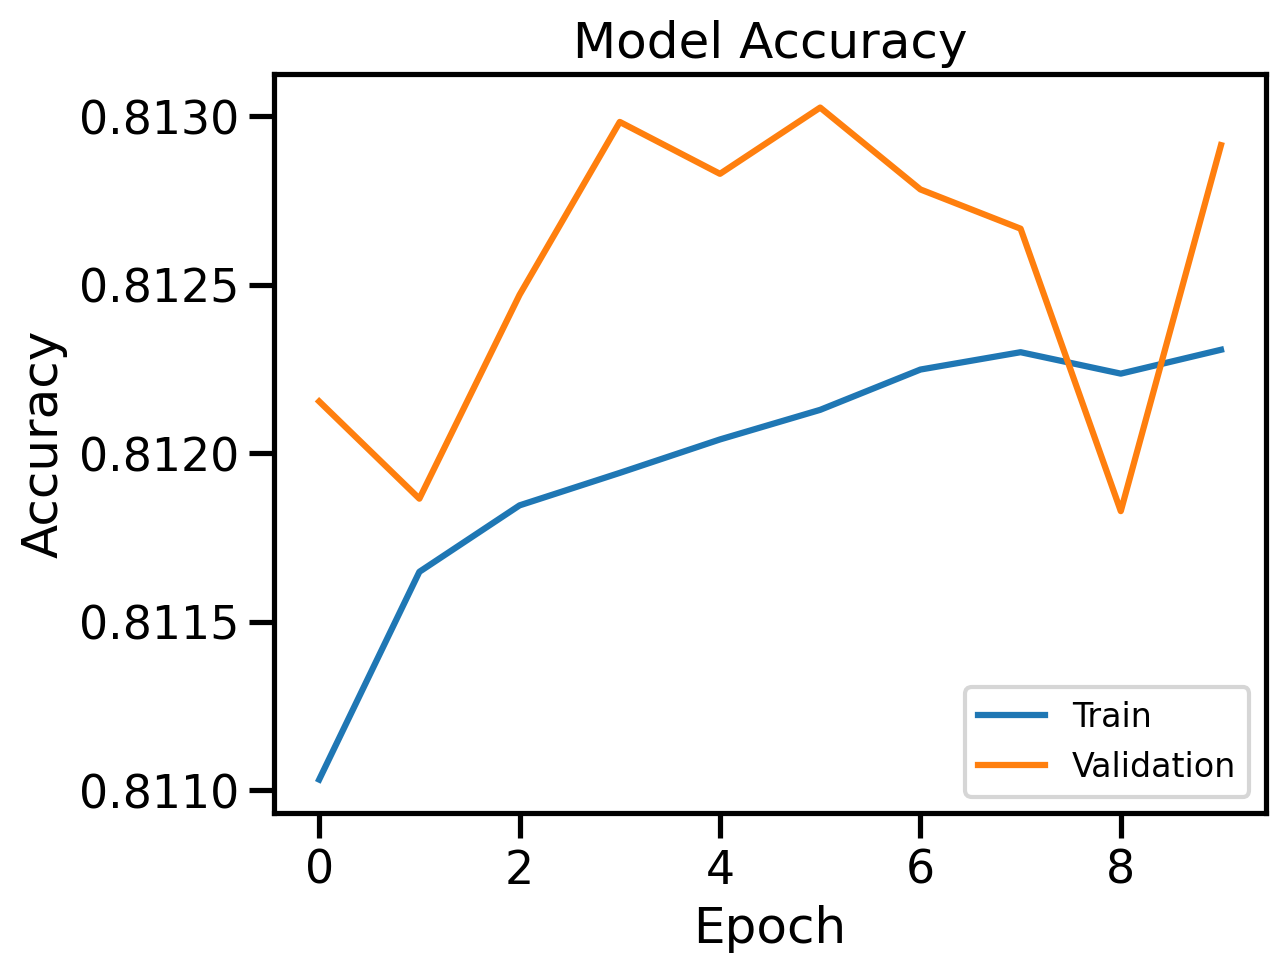

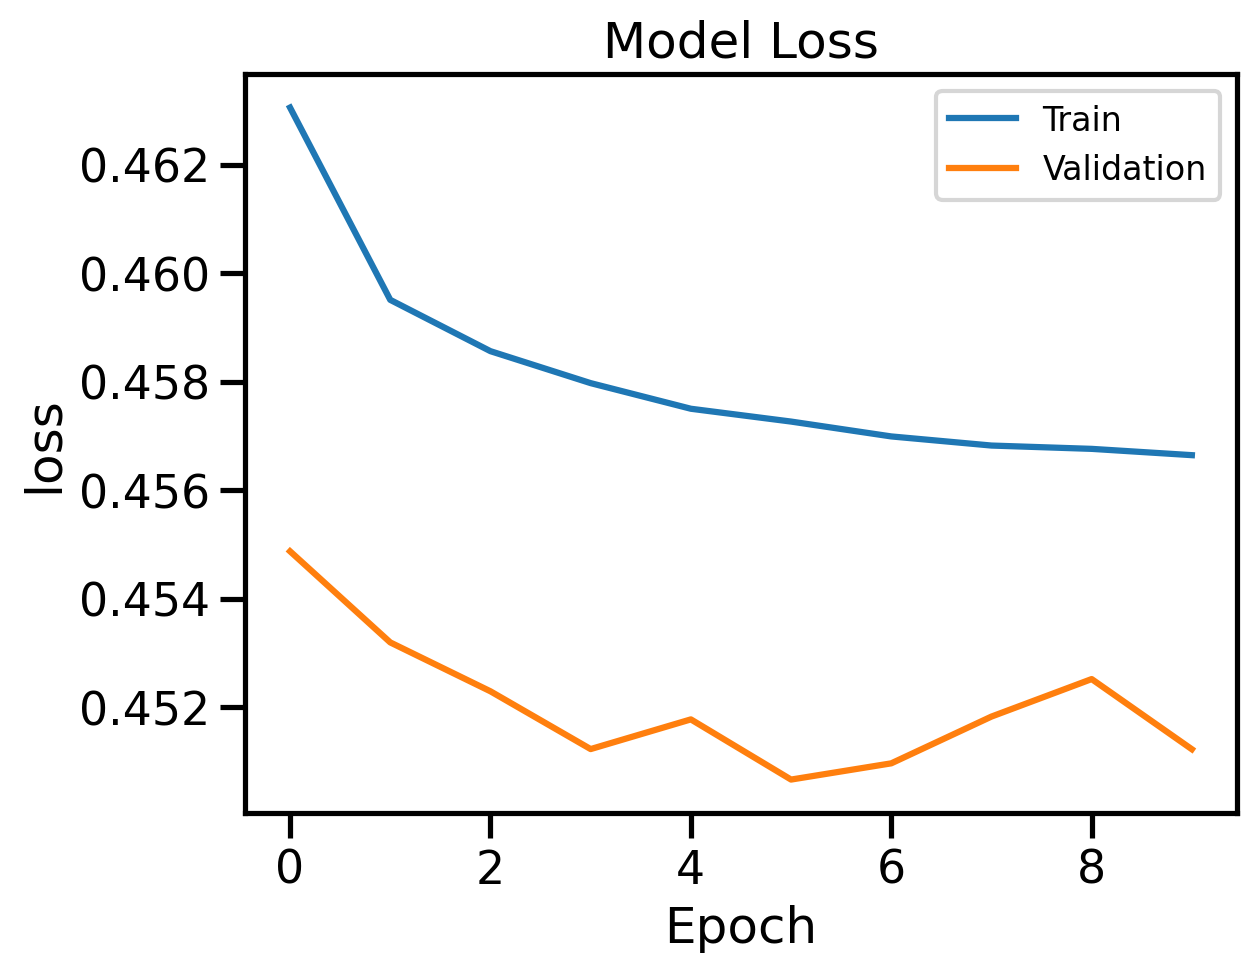

In [19]:
# Call the accuracy_loss_plot function to visualize the model performance during training.
accuracy_loss_plot(history) 

The provided figures show the performance of the ANN model designed for binary classification of flight delays (1 if delay exceeds 15 minutes, 0 otherwise). The model demonstrates consistent improvement in accuracy and reduction in loss across the 10 epochs.





<br>

<br>

### 2. Using the dropout layer = 0.1

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                1024      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


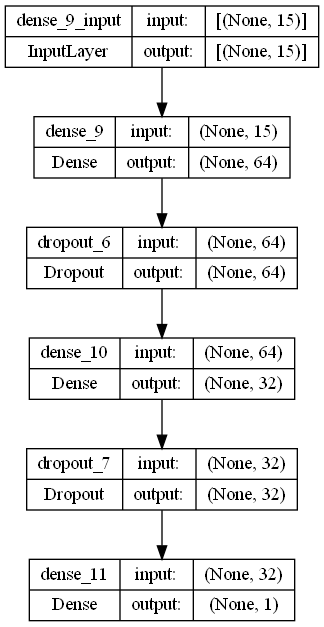

In [25]:
# Define the model
model1 = Sequential()
# Add layers to the model
model1.add(Dense(64, activation='relu', input_dim = 15))  
model1.add(Dropout(0.1))  # Dropout layer to prevent overfitting
model1.add(Dense(32, activation='relu'))  # Hidden layer with 64 neurons and ReLU activation
model1.add(Dropout(0.1))  # Dropout layer
model1.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification 

model1.summary()
#Use the Keras Sequential Architecture
plot_model(model1, show_shapes=True, show_layer_names=True)

In [27]:
# Compile the model
model1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the Model (verbos = 2 to display the training progress for each epochs )
history_adam_pca = model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2) 


Epoch 1/10
17710/17710 - 38s - loss: 0.6556 - accuracy: 0.6108 - val_loss: 0.6489 - val_accuracy: 0.6195 - 38s/epoch - 2ms/step
Epoch 2/10
17710/17710 - 52s - loss: 0.6488 - accuracy: 0.6199 - val_loss: 0.6448 - val_accuracy: 0.6239 - 52s/epoch - 3ms/step
Epoch 3/10
17710/17710 - 61s - loss: 0.6469 - accuracy: 0.6227 - val_loss: 0.6432 - val_accuracy: 0.6266 - 61s/epoch - 3ms/step
Epoch 4/10
17710/17710 - 35s - loss: 0.6456 - accuracy: 0.6247 - val_loss: 0.6433 - val_accuracy: 0.6266 - 35s/epoch - 2ms/step
Epoch 5/10
17710/17710 - 31s - loss: 0.6446 - accuracy: 0.6261 - val_loss: 0.6420 - val_accuracy: 0.6293 - 31s/epoch - 2ms/step
Epoch 6/10
17710/17710 - 51s - loss: 0.6437 - accuracy: 0.6275 - val_loss: 0.6414 - val_accuracy: 0.6296 - 51s/epoch - 3ms/step
Epoch 7/10
17710/17710 - 33s - loss: 0.6433 - accuracy: 0.6283 - val_loss: 0.6410 - val_accuracy: 0.6313 - 33s/epoch - 2ms/step
Epoch 8/10
17710/17710 - 53s - loss: 0.6428 - accuracy: 0.6285 - val_loss: 0.6395 - val_accuracy: 0.6326

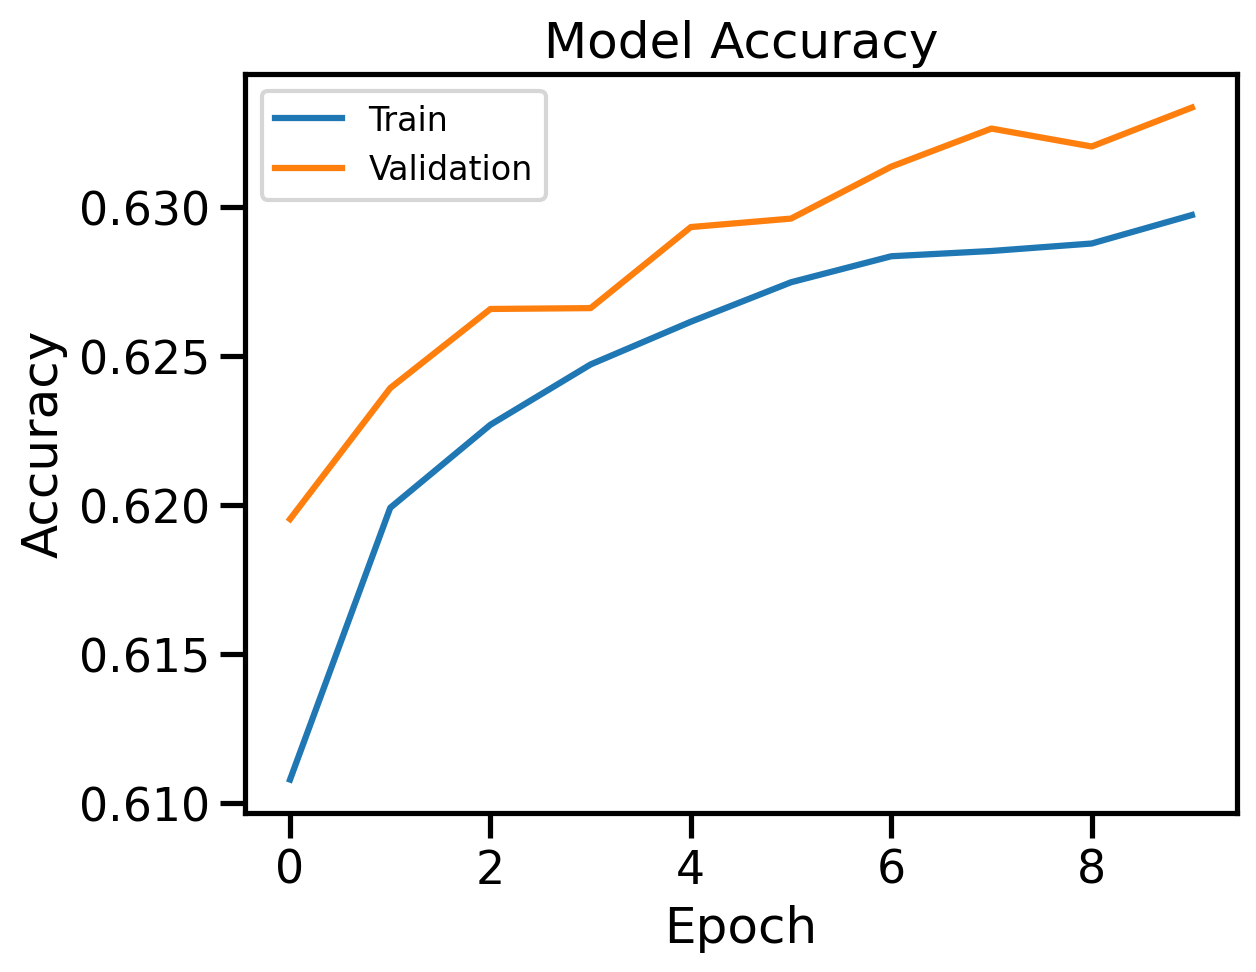

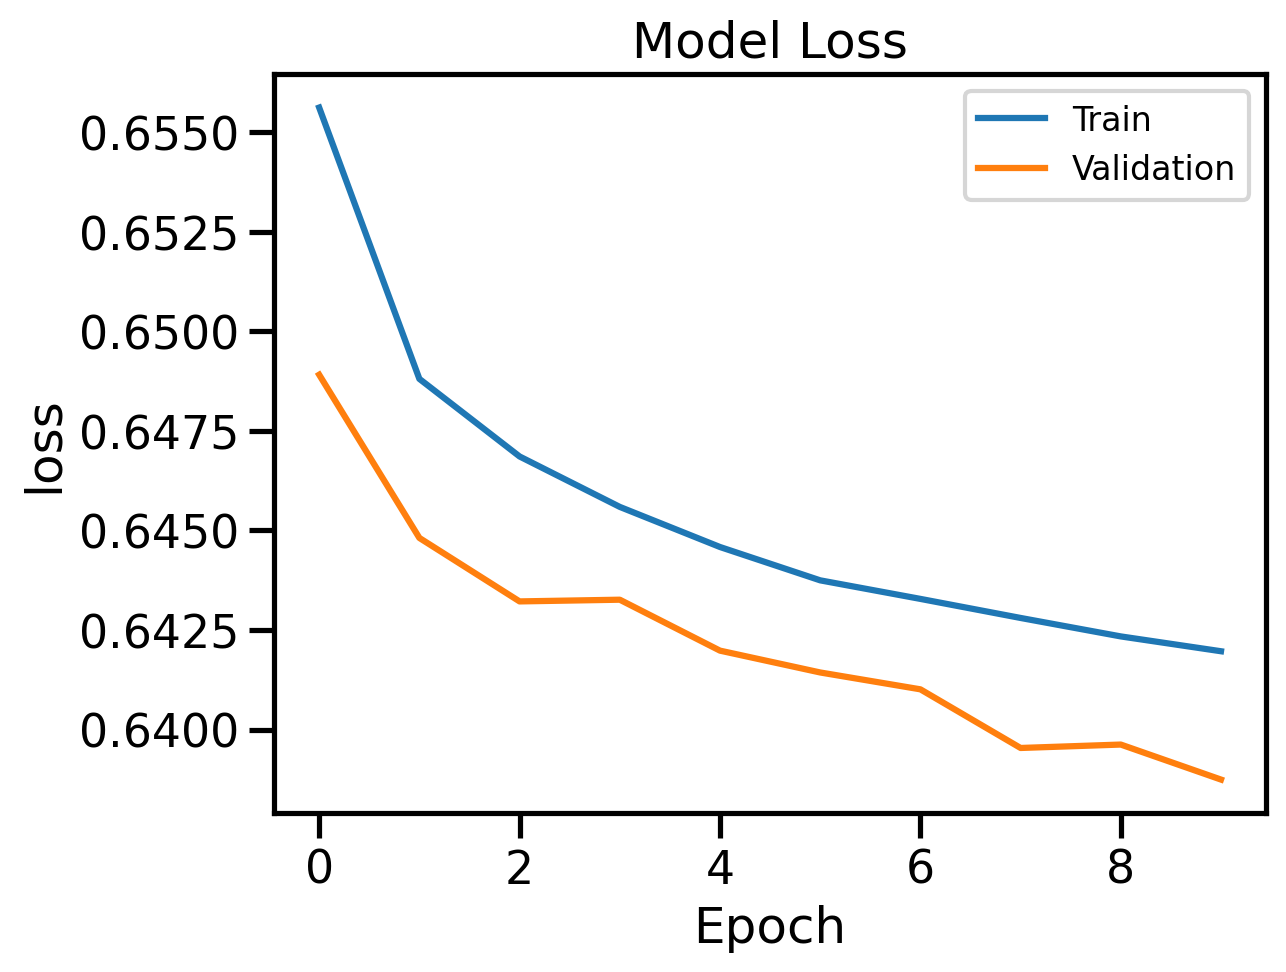

In [29]:
 # Call the accuracy_loss_plot function to visualize the model performance during training.
accuracy_loss_plot(history_adam_pca) 

Using dropout = 0.1 make the model fit well for the test data and training data.

In [32]:
# Define the model
model = Sequential()
# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=15))  # Input layer with 128 neurons and ReLU activation
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))  # Hidden layer with 64 neurons and ReLU activation
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification 
model.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                1024      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Define the model
model = Sequential()
# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=15))  # Input layer with 128 neurons and ReLU activation
model.add(Dropout(0.1))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))  # Hidden layer with 64 neurons and ReLU activation
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification 
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1024      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


In [43]:
from keras.optimizers import Adam
# Set the desired learning rate
lr = 0.1  # This is just an example value; you can set it to your preferred rate

optimizer = Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
X_train

array([[-0.54402979, -0.68126856, -0.52780526, ..., -0.1365537 ,
        -0.17828789, -0.07670882],
       [-0.44548003,  0.8923907 , -0.17361965, ..., -0.15302842,
        -0.02217913, -0.04952383],
       [-0.51992324, -0.54570321, -0.35453253, ...,  0.13320451,
         0.10765694, -0.03097667],
       ...,
       [-0.1661359 ,  0.1993038 , -0.23596767, ..., -0.2185543 ,
         0.11548477,  0.02180029],
       [-0.21994221,  0.04645416,  0.44852451, ...,  0.02922332,
         0.28099418,  0.01895539],
       [ 0.66207784,  0.6245973 , -0.03684173, ...,  0.18069834,
         0.18273689,  0.16905418]])

In [45]:
# istory_adam_pca = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2) 
#  train the Model (verbos = 2 to display the training progress for each epochs )
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2) 

Epoch 1/10
17710/17710 - 33s - loss: 0.6985 - accuracy: 0.4998 - val_loss: 0.6946 - val_accuracy: 0.5002 - 33s/epoch - 2ms/step
Epoch 2/10
17710/17710 - 30s - loss: 0.6964 - accuracy: 0.5011 - val_loss: 0.6949 - val_accuracy: 0.5002 - 30s/epoch - 2ms/step
Epoch 3/10
17710/17710 - 30s - loss: 0.6960 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.5002 - 30s/epoch - 2ms/step
Epoch 4/10
17710/17710 - 30s - loss: 0.6982 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.4998 - 30s/epoch - 2ms/step
Epoch 5/10
17710/17710 - 29s - loss: 0.6960 - accuracy: 0.4993 - val_loss: 0.6955 - val_accuracy: 0.5002 - 29s/epoch - 2ms/step
Epoch 6/10
17710/17710 - 29s - loss: 0.6954 - accuracy: 0.4998 - val_loss: 0.6937 - val_accuracy: 0.4998 - 29s/epoch - 2ms/step
Epoch 7/10
17710/17710 - 30s - loss: 0.6954 - accuracy: 0.4993 - val_loss: 0.6942 - val_accuracy: 0.4998 - 30s/epoch - 2ms/step
Epoch 8/10
17710/17710 - 29s - loss: 0.6969 - accuracy: 0.5007 - val_loss: 0.6934 - val_accuracy: 0.5002

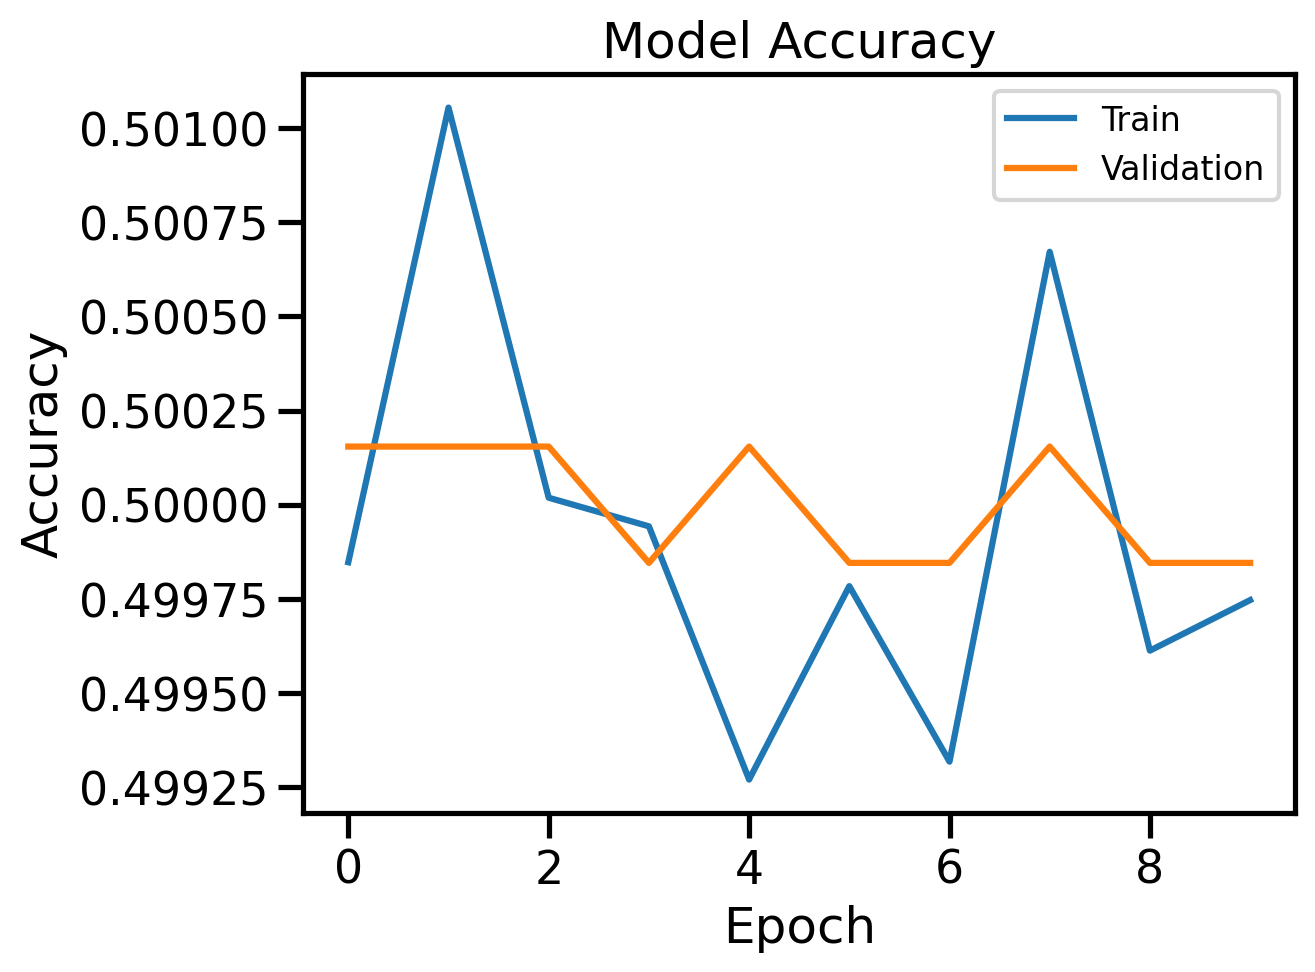

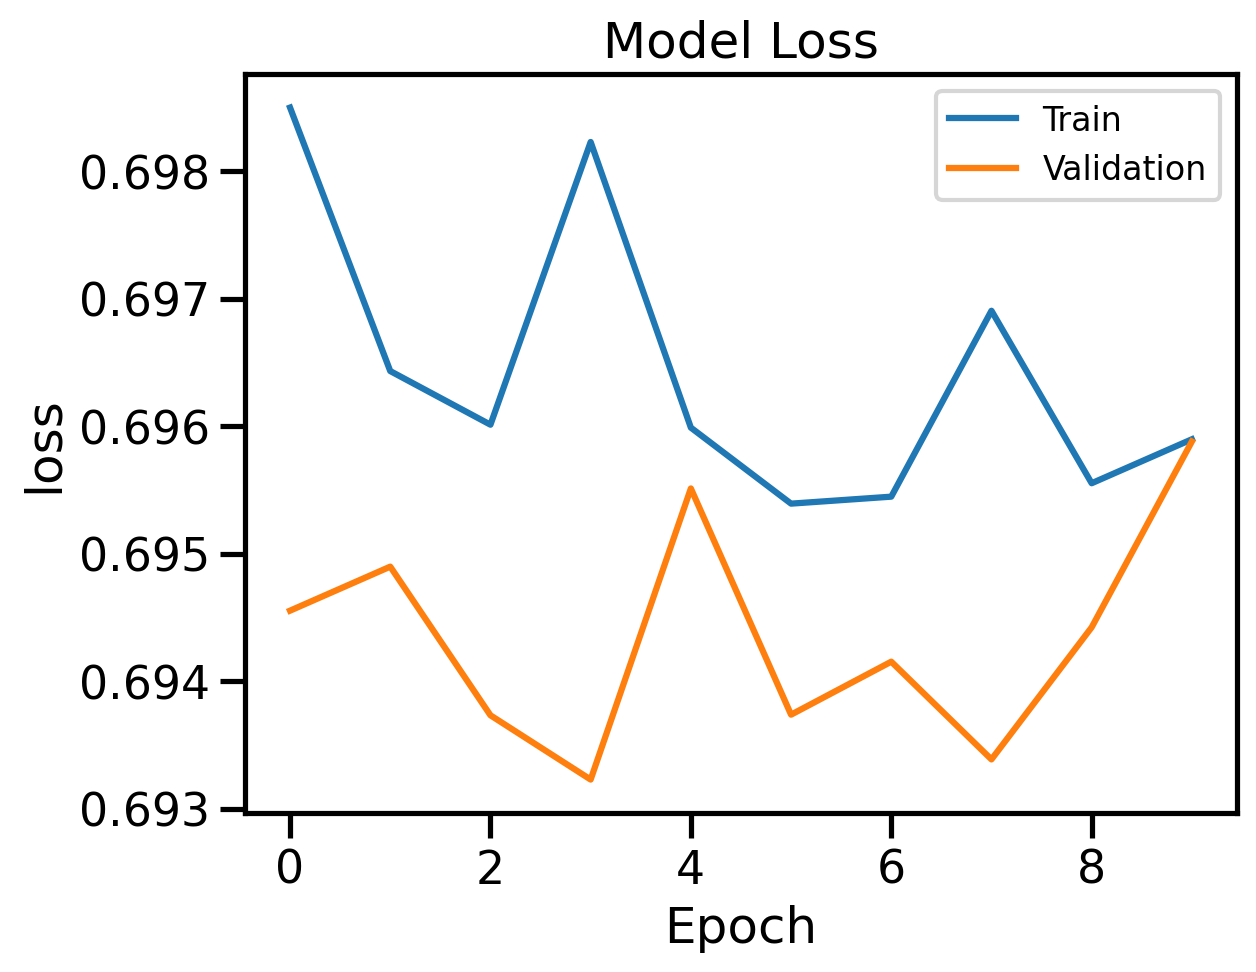

In [46]:
accuracy_loss_plot(history) 

In [41]:
history
